In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import beta
import math

In [2]:
plt.style.use('/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle')

Bad value in file '/Users/lib278/Code/Python3/mpl_stylefiles/mystyle.mplstyle', line 17 ("mathtext.fallback: dejavsans  # Select fallback font from ['cm' (Computer Modern), 'stix'"): Key mathtext.fallback: dejavsans is not a valid fallback font name. Valid fallback font names are cm,stix,stixsans. Passing 'None' will turn fallback off.


In [3]:
def factorial(number):
    fact = 1
    for i in range(1, number+1):
        fact = fact * i
    return fact

In [4]:
primordial_disks_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/'
primordial_disks_sample_directory = primordial_disks_directory+'Tables/Condensed_Sample_By_Date/'
test_figures_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/Test_Figures/'

HBM_directory = '/Users/lib278/Documents/Manuscripts/PRIMORDIAL_DISKS/HBM/Lauren_epop_analysis_2024-March-6/Final_HBM_Files/'


R_shift = int(1)
P_shift = int(1)
sampling_resolution = 'high'  # 'high'  # 'med'  # 'low'

Rshift_text = 'Rshift' + str(R_shift)
Pshift_text = 'Pshift' + str(P_shift)
resolution_text = sampling_resolution + 'Res'

date_str = '2024-Apr-17'

sample_filepath_stassun = primordial_disks_sample_directory + 'adopted_' + resolution_text + '_' + date_str + '.csv'


condensed_df_stassun = pd.read_csv(sample_filepath_stassun)

condensed_df_stassun['vsini Unc'].replace('ulimit', 0.0000, inplace=True)
condensed_df_stassun['vsini Unc'] = condensed_df_stassun['vsini Unc'].astype(float)

exclude_objects = ['HP Tau', 'DL Tau']
for object_i in exclude_objects:
    condensed_df_stassun = condensed_df_stassun[condensed_df_stassun['Simbad Name'] != object_i]

# condensed_df_stassun.to_latex()



In [5]:
istars = condensed_df_stassun['i star (deg)'].values
istars_gt_80 = istars[istars > 80]
num_istars = len(istars)
num_istars_gt_80 = len(istars_gt_80)
print(num_istars_gt_80)
print(num_istars)

13
41


k =  13
N =  41


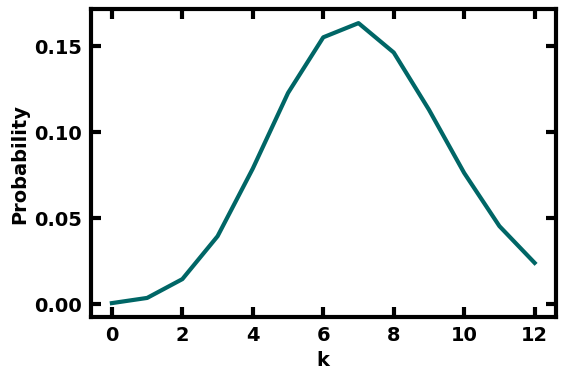

Probability =  0.031


In [6]:
def factorial(number):
    fact = 1
    for i in range(1, number+1):
        fact = fact * i
    return fact




k_values = np.arange(0, (num_istars_gt_80 - 1) + 1, 1)
p = 0.174
n = num_istars

print('k = ', num_istars_gt_80)
print('N = ', num_istars)

Prob_k_given_p_and_n = []
for k_i, k in enumerate(k_values):
    Prob_k = (factorial(n) / (factorial(k) * factorial(n - k))) * p**k * (1. - p)**(n - k)
    Prob_k_given_p_and_n.append(Prob_k)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)

ax.plot(k_values, np.array(Prob_k_given_p_and_n), lw=3)

plt.show()

sum_of_Prob_k_given_p_and_n = np.trapz(y=Prob_k_given_p_and_n, x=k_values)

Prob = round(1. - sum_of_Prob_k_given_p_and_n, 3)

print('Probability = ', Prob)
